# Modele analizy danych

### 2024/2025, semestr zimowy
Tomasz Rodak

---

## Literatura
   1. James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor,
      J. (2023). An Introduction to Statistical Learning: With
      Applications in Python.
      
      [ISLP](https://www.statlearning.com/)
   
   2. Bishop, C. M., & Nasrabadi, N. M. (2006). Pattern recognition and
      machine learning (Vol. 4, No. 4, p. 738). New York: springer. 
   
      [PRML](https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/)
   
   3. Kroese, D. P., Botev, Z., Taimre, T., & Vaisman, R. (2019). Data
      science and machine learning: mathematical and statistical
      methods. CRC Press.
   
      [https://people.smp.uq.edu.au/DirkKroese/DSML/](https://people.smp.uq.edu.au/DirkKroese/DSML/)
   
   4. Hastie, T., Tibshirani, R., Friedman, J. H., & Friedman,
      J. H. (2009). The elements of statistical learning: data mining,
      inference, and prediction (Vol. 2, pp. 1-758). New York:
      springer.
   
      [https://hastie.su.domains/ElemStatLearn/](https://hastie.su.domains/ElemStatLearn/)
   
   5. Murphy, K. P. (2022). Probabilistic machine learning: an
      introduction. MIT press.
   
      [https://probml.github.io/pml-book/book1.html](https://probml.github.io/pml-book/book1.html)
   
   6. Murphy, K. P. (2023). Probabilistic machine learning: Advanced
      topics. MIT press.
   
      [https://probml.github.io/pml-book/book2.html](https://probml.github.io/pml-book/book2.html)
   
   7. Bishop, C. M., & Bishop, H (2024). Deep learning. Springer.
   
      [https://www.bishopbook.com/](https://www.bishopbook.com/)
   
   8. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.
   
      [https://www.deeplearningbook.org/](https://www.deeplearningbook.org/)

---

## Wykład I

ISLP, rozdz. 1, 2.

---

## Uczenie statystyczne i maszynowe

Budowa modeli na podstawie danych obserwacyjnych. Modele służą do tworzenia prognoz (predykcji) i/lub wnioskowania (inferencji).

Rodzaje modeli:
- nadzorowane (_supervised_) - dane zawierają informację o wartościach zmiennej objaśnianej (zmienna celu, _target variable_);
- nienadzorowane (_unsupervised_) - dane nie zawierają informacji o wartościach zmiennej objaśnianej;
- mieszane (_semi-supervised_) - dane zawierają informację o wartościach zmiennej objaśnianej, ale tylko części z nich;
- ze wzmocnieniem (_reinforcement_) - podejmowanie decyzji w zmiennym środowisku (np. gry planszowe, sterowanie robotem).

## Przykład: zbiór _Wage_

Zbiór przedstawia wynagrodzenie mężczyzn z regionu atlantyckiego USA w zależności od wieku, wykształcenia, stanu cywilnego i innych zmiennych.

Początek ramki:

In [1]:
import pandas as pd

wage = pd.read_csv("datasets/Wage.csv")
wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


* Zmienną celu jest `wage` (wynagrodzenie), jest to zmienna ciągła. Chcemy zbudować model przewidujący jej wartość na podstawie pozostałych zmiennych (z wyjątkiem `logwage`, która jest logarytmem z `wage`). Jest to problem regresji.
* Jeżeli model będzie interpretowalny, to będziemy mogli wnioskować o wpływie zmiennych na zmienną celu.

Importy:

In [2]:
import seaborn as sns # wykresy statystyczne
import matplotlib.pyplot as plt # ogólna biblioteka do rysunków
sns.set()

Wykres rozproszenia, zależność `wage` od `age`:

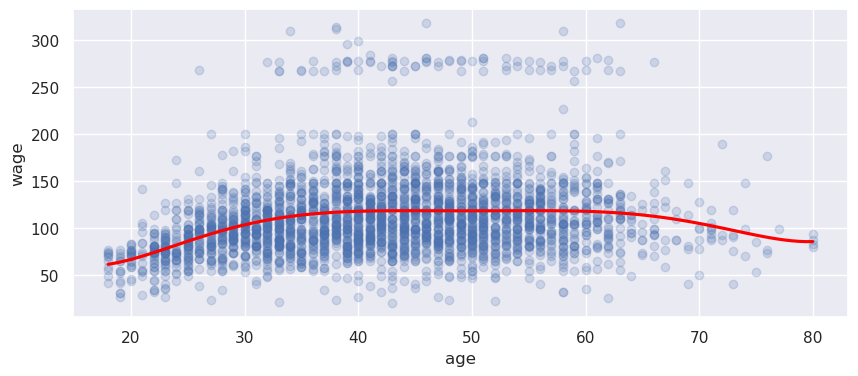

In [3]:
plt.figure(figsize=(10,4))
sns.regplot(x='age', y='wage', data=wage,
            order=6, ci=None,
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'});

Wykres rozproszenia, zależność `wage` od `year`:

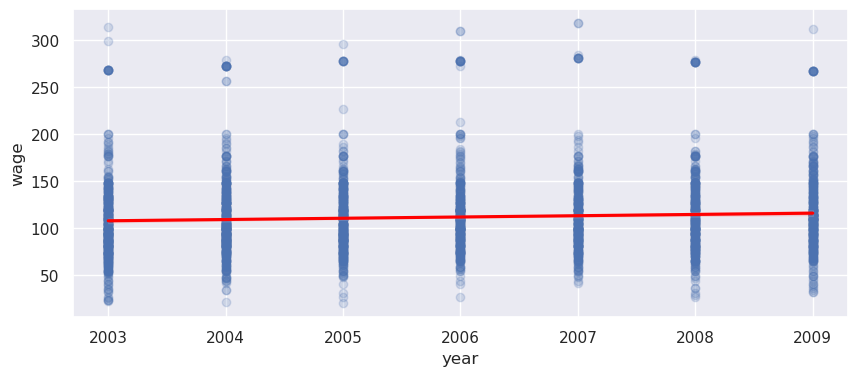

In [4]:
plt.figure(figsize=(10,4))
sns.regplot(x='year', y='wage', data=wage,
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'});

Wykresy pudełkowe, zależność `wage` od `education`:

In [5]:
wage.education.unique()

array(['1. < HS Grad', '4. College Grad', '3. Some College', '2. HS Grad',
       '5. Advanced Degree'], dtype=object)

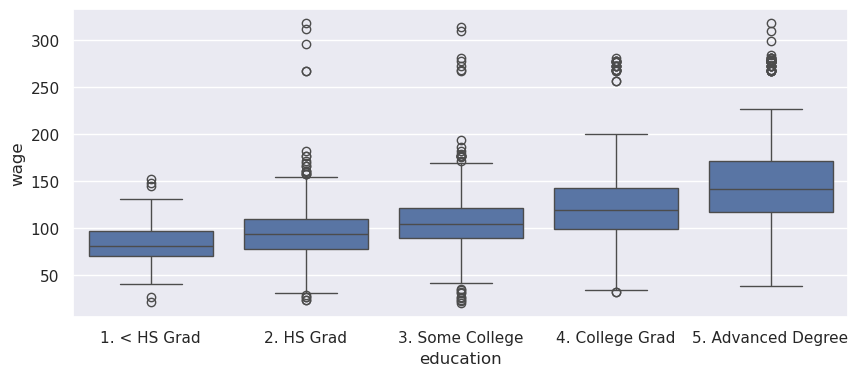

In [6]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="education", y="wage", data=wage,
            order=['1. < HS Grad', '2. HS Grad', '3. Some College', '4. College Grad', '5. Advanced Degree']);

## Przykład: zbiór _Smarket_

In [7]:
smarket = pd.read_csv("datasets/Smarket.csv")
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


Zmienną celu jest `Direction`, jest to zmienna kategoryjna. Zmienne `Lag1`-`Lag5` to procentowe zmiany kursu akcji w kolejnych dniach. Chcemy zbudować model przewidujący zmianę kursu akcji, akcje rosną (*Up*) czy spadają (*Down*), na podstawie zmian kursu w poprzednich dniach. Jest to zadanie klasyfikacji.

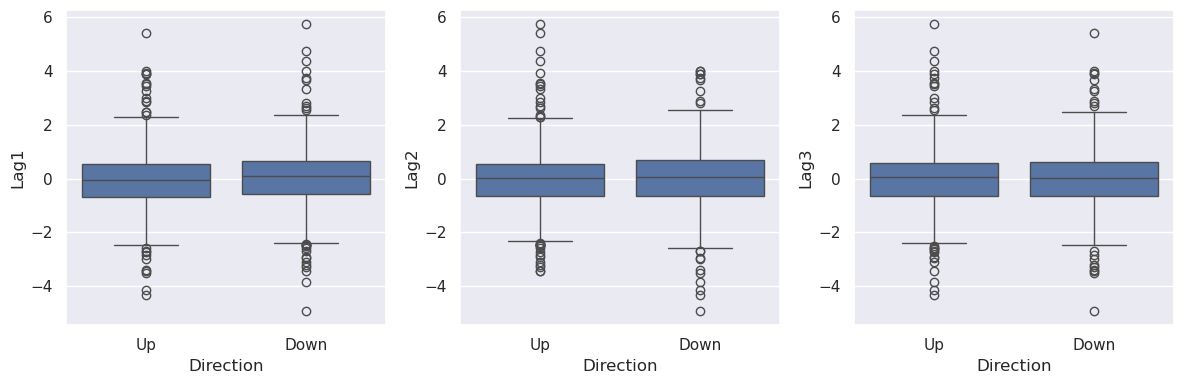

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
for ax, col in zip([ax1, ax2, ax3], ['Lag1', 'Lag2', 'Lag3']):
    sns.boxplot(x='Direction', y=col, data=smarket, ax=ax)
# tight_layout() poprawia czytelność wykresów
plt.tight_layout()

## Przykład: zbiór _NCI60_

Brak zmiennej celu. Pomiary ekspresji genów dla 64 komórek nowotworowych. Chcemy zbudować model pozwalający na wyodrębnienie podgrup komórek nowotworowych. Jest to problem grupowania, czyli zadanie nienadzorowane.

Pomiary ekspresji:

In [9]:
import numpy as np
nci60_data = np.loadtxt("datasets/nci60_data.txt")
nci60_labels = pd.read_csv("datasets/nci60_labels.csv", )

In [10]:
nci60_data[:5, :5]

array([[ 0.3     ,  1.18    ,  0.55    ,  1.14    , -0.265   ],
       [ 0.679961,  1.289961,  0.169961,  0.379961,  0.464961],
       [ 0.94    , -0.04    , -0.17    , -0.04    , -0.605   ],
       [ 0.28    , -0.31    ,  0.68    , -0.81    ,  0.625   ],
       [ 0.485   , -0.465   ,  0.395   ,  0.905   ,  0.2     ]])

In [11]:
nci60_labels.head()

,label
0,CNS
1,CNS
2,CNS
3,RENAL
4,BREAST


Typy nowotworów:

In [12]:
nci60_labels['label'].value_counts()

label
RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
UNKNOWN        1
K562B-repro    1
K562A-repro    1
MCF7A-repro    1
MCF7D-repro    1
Name: count, dtype: int64

Redukcja wymiarowości za pomocą PCA (_Principal Component Analysis_):

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
nci_scaled = scaler.fit_transform(nci60_data.T)
pca = PCA(n_components=2)
pca.fit(nci_scaled)

PCA(n_components=2)

Wrzucamy wyniki do ramki danych:

In [14]:
import pandas as pd

df = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'])
df['labels'] = nci60_labels['label']
df.head()

,PC1,PC2,labels
0,0.122469,-0.002852,CNS
1,0.128047,0.006179,CNS
2,0.165397,-0.014136,CNS
3,0.173887,0.067042,RENAL
4,0.209682,0.007484,BREAST


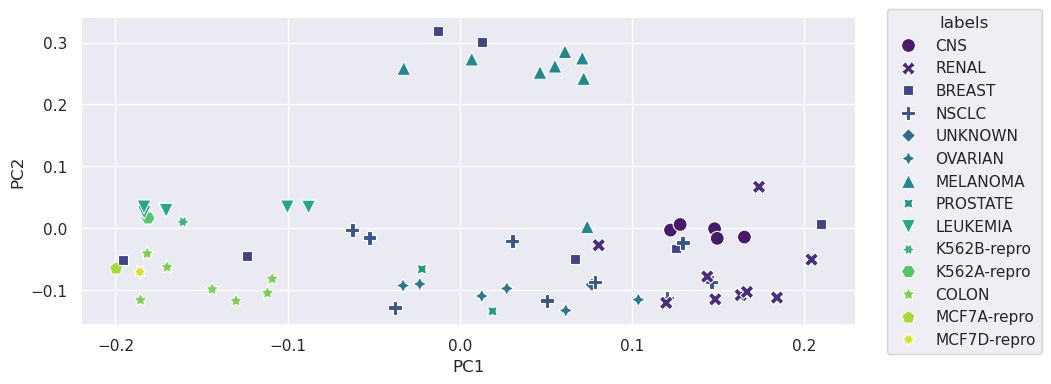

In [15]:
plt.figure(figsize=(10, 4))
ax = sns.scatterplot(x='PC1', y='PC2', hue='labels',
                     style='labels', data=df, palette='viridis', s=100)
sns.move_legend(ax, 'upper right', bbox_to_anchor=(1.25, 1.05));

## Model regresji

Zmienne niezależne (cechy, predyktory, zmienne objaśniające, _features_, _predictors_, _explanatory variables_): 

\begin{equation*}
X = (X_1, X_2, \ldots, X_p)
\end{equation*}

Zakładamy, że ciągła zmienna zależna $Y$ (zmienna celu, _target variable_) wiąże się z $X$ za pomocą relacji:

\begin{equation*}
Y = f(X) + \varepsilon.
\end{equation*}

Zmienna losowa $\varepsilon$ oznacza błąd, który jest niezależny od $X$ i ma średnią zero. Funkcja $f$ jest nieznana, naszym celem jest jej estymacja.

### Predykcja

Symbolem $\hat{f}$ oznaczamy wyliczoną na podstawie danych estymację funkcji $f$. Wówczas predykcja dla nowego obiektu $X$ wygląda następująco:

\begin{equation*}
\hat{Y} = \hat{f}(X).
\end{equation*}

W tym przypadku $\hat{f}$ traktujemy jak _czarną skrzynkę_ (_black box_). Dopóki $\hat{f}$ dobrze przewiduje wartości $Y$, jej dokładna postać nie jest istotna.

### Błąd systematyczny i błąd losowy

Załóżmy, że wyznaczyliśmy już funkcję $\hat{f}$. Jakiego błędu możemy się spodziewać w punkcie $x_0$?

Mamy:

\begin{equation*}
\begin{split}
\mathbf{E}((Y - \hat{f}(X))^2|X=x_0) &= \mathbf{E}(f(x_0) + \varepsilon - \hat{f}(x_0))^2 \\
 &= \mathbf{E}((f(x_0) - \hat{f}(x_0))^2 + 2(f(x_0) - \hat{f}(x_0))\varepsilon + \varepsilon^2) \\
 &= (f(x_0) - \hat{f}(x_0))^2 + 2(f(x_0) - \hat{f}(x_0))\mathbf{E}(\varepsilon) + \mathbf{E}(\varepsilon^2) \\
 &=[f(x_0) - \hat{f}(x_0)]^2 + \operatorname{Var}(\varepsilon).
 \end{split}
\end{equation*}

W powyższych wyliczeniach skorzystaliśmy z założenia, że $\mathbf{E}(\varepsilon) = 0$. To spowodowało, że drugi składnik zniknął a ostatni zamienił się w wariancję $\varepsilon$.

Podsumowując:

\begin{equation}
\mathbf{E}((Y - \hat{f}(X))^2|X=x_0) = \underbrace{[f(x_0) - \hat{f}(x_0)]^2}_{\text{Błąd systematyczny}} + \underbrace{\operatorname{Var}(\varepsilon)}_{\text{Błąd losowy}}.
\end{equation}

W powyższym wzorze:
* Pierwszy składnik w (1) to _błąd systematyczny_ (_systematic error_, _reducible error_). Jest to błąd pokazujący jak bardzo część nielosowa procesu $f(X)$ różni się od estymacji $\hat{f}(X)$. **Błąd ten jest redukowalny**, możemy go, przynajmniej teoretycznie, zmniejszyć do zera. 
* Składnik drugi to _błąd losowy_ (_random error_, _irreducible error_). Jest to błąd wynikający z zależności $Y$ od $\varepsilon$, które jest zmienną losową o niezerowej wariancji. Błąd ten jest niezależny od $X$ i **nie może być zmniejszony**.

### Wnioskowanie

W przypadku, gdy $\hat{f}$ jest interpretowalna, możemy wnioskować o wpływie zmiennych $X$ na $Y$. Przykładowo, jeżeli $\hat{f}$ jest modelem liniowym, to współczynniki $\hat{\beta_j}$ pozwalają na wnioskowanie o wpływie $X_j$ na $Y$.

### Jak wyznaczyć $\hat{f}$?

#### Metody parametryczne

Zakładamy, że $f$ należy do pewnej rodziny funkcji $f_{\beta}$, gdzie $\beta$ jest wektorem parametrów. Przykładowo, jeżeli $f$ jest modelem liniowym, to 

\begin{equation*}
f_{\beta}(X) = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p.
\end{equation*}

Po dokonaniu wyboru modelu wyznaczamy parametry na podstawie danych. Jest to etap trenowania (_training_ albo _fitting_).

* Zalety: interpretowalność, mniejsza złożoność obliczeniowa.
* Wady: zakładamy pewną postać funkcji $f$, która może być nieprawdziwa.

##### Przykład

Model liniowy, dane symulowane:

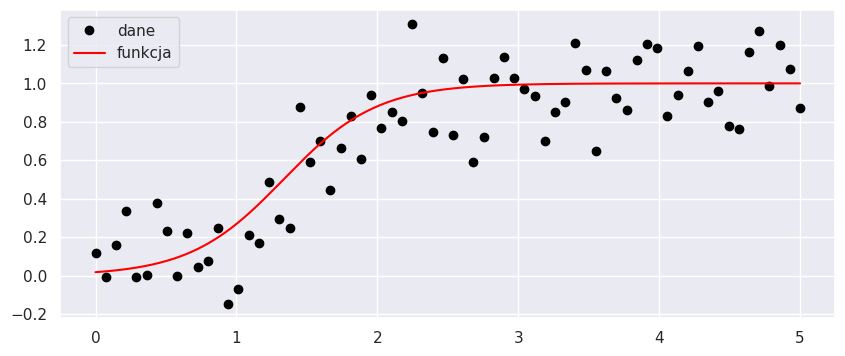

In [16]:
import numpy as np

def f(x): # funkcja do estymacji
    return 1 / (1 + np.exp(-3*x + 4))

n = 70 # liczba obserwacji
a, b = 0, 5 # przedział
sd = 0.2 # odchylenie standardowe

rng = np.random.RandomState(42) # generator liczb losowych
x = np.linspace(a, b, n)
eps = rng.normal(scale=sd, size=n) # błąd losowy
y = f(x) + eps # obserwacje

# wizualizacja
plt.figure(figsize=(10, 4))
plt.plot(x, y, 'o', label='dane', color='black')
pts = np.linspace(a, b, 1000)
plt.plot(pts, f(pts), '-', label='funkcja', color='red')
plt.legend();

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # wybór modelu regresji
model.fit(x.reshape(-1, 1), y) # dopasowanie modelu
yhat = model.predict(x.reshape(-1, 1)) # predykcja
# Parametry modelu
model.coef_, model.intercept_

(array([0.2214085]), np.float64(0.14846850628554065))

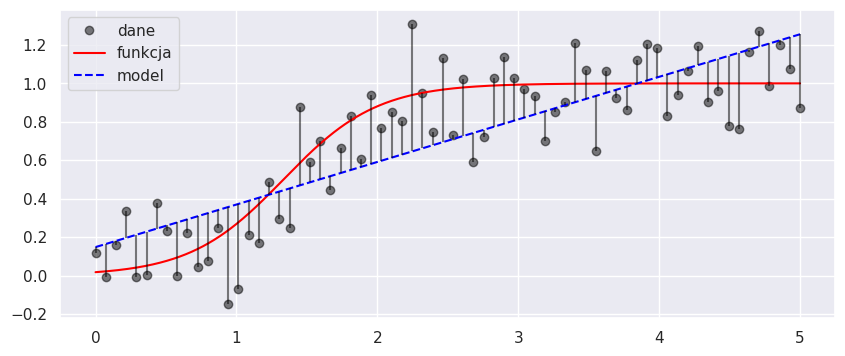

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(x, y, 'o', label='dane', color='black', alpha=0.5)
pts = np.linspace(a, b, 1000)
plt.plot(pts, f(pts), '-', label='funkcja', color='red')
plt.plot(pts, model.predict(pts.reshape(-1, 1)), '--', label='model', color='blue')
ax = plt.gca()
ax.vlines(x, yhat, y, color='black', alpha=0.5)
plt.legend();

### Metody nieparametryczne

Nie zakładamy żadnej postaci funkcji $f$. Na przykład, w przypadku regresji za pomocą procesu gaussowskiego (_Gaussian process regression_) zakładamy, że $f$ jest realizacją pewnego procesu stochastycznego. Wybór modelu polega na wyborze jądra (_kernel_) realizującego macierz kowariancji. Jądro zwykle ma parametry, które wyznaczamy na podstawie danych, nie są to jednak parametry funkcji $f$.

* Zalety: nie zakładamy postaci funkcji $f$, co może prowadzić do lepszych wyników.
* Wady: mniejsza interpretowalność, większa złożoność obliczeniowa, wymagana duża liczba obserwacji.

##### Przykład

Regresja za pomocą procesu gaussowskiego, dane zdefiniowane wcześniej:

In [19]:
# Gaussian Process Regression
from sklearn.gaussian_process import GaussianProcessRegressor # model
from sklearn.gaussian_process.kernels import RBF, WhiteKernel # jądra

# jądro RBF + WhiteKernel z ustalonymi parametrami
kernel = 1.0*RBF(length_scale=3.0) + 1.0*WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e-3))
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10) # model
gpr.fit(x.reshape(-1, 1), y) # dopasowanie modelu
yhat = gpr.predict(x.reshape(-1, 1)) # predykcja
gpr.kernel_ # jądro po dopasowaniu do danych

0.698**2 * RBF(length_scale=3.07) + 0.0119**2 * WhiteKernel(noise_level=6.57e-10)

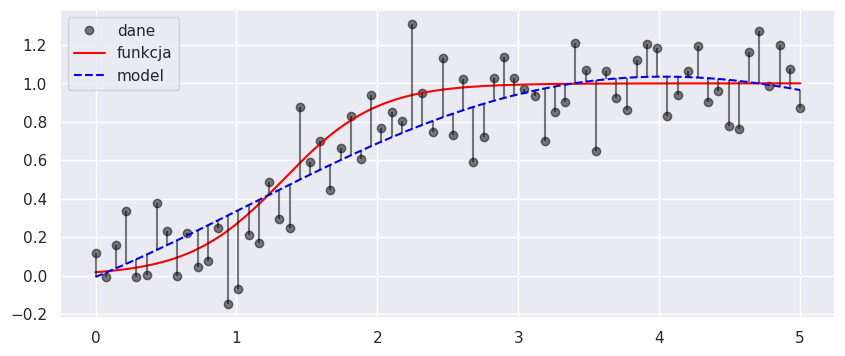

In [20]:
plt.figure(figsize=(10, 4))
plt.plot(x, y, 'o', label='dane', color='black', alpha=0.5)
pts = np.linspace(a, b, 1000)
plt.plot(pts, f(pts), '-', label='funkcja', color='red')
plt.plot(pts, gpr.predict(pts.reshape(-1, 1)), '--', label='model', color='blue')
ax = plt.gca()
ax.vlines(x, yhat, y, color='black', alpha=0.5)
plt.legend();


### Kompromis między interpretowalnością a dokładnością

Modele mogą być mniej lub bardziej elastyczne. Modele bardziej elastyczne cechują się słabą interpretowalnością i potencjalnie wysoką dokładnością. Modele restrykcyjne odwrotnie.

* Model regresji liniowej jest bardzo restrykcyjny, gdyż zakładamy w nim, że zmienna zależna jest liniową funkcją zmiennych niezależnych. Model ten jest bardzo interpretowalny, ale może mieć niską dokładność. Podobna sytuacja występuje w przypadku regresji logistycznej służącej do klasyfikacji.
* Model sieci neuronowej jest bardzo elastyczny, ponieważ zakładamy, że zmienna zależna jest nieliniową funkcją zmiennych niezależnych, ponadto model ten ma wiele parametrów. Sieci neuronowe cechują się bardzo niską interpretowalnością, ale mogą mieć wysoką dokładność.
* Jeśli celem jest predykcja, to zwykle wybieramy model bardziej elastyczny, duże znaczenie ma wtedy dokładność predykcji, a nie interpretowalność. Jeśli celem jest wnioskowanie, to model powinien być interpretowalny, a dokładność predykcji jest mniej istotna.

### Metody nadzorowane vs nienadzorowane

Regresja i klasyfikacja to przykłady metod nadzorowanych. Wraz z każdą obserwacją dana jest odpowiadająca jej wartość zmiennej celu. W przypadku metod nienadzorowanych nie mamy zmiennej celu, a zadanie polega na wyodrębnieniu struktury w danych. Przykładem metody nienadzorowanej jest grupowanie (_clustering_).

##### Przykład

Grupowanie metodą k-średnich (_k-means clustering_) obrazka RGB:

In [21]:
import requests # biblioteka do pobierania danych z internetu

url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Podbia%C5%82.jpg/330px-Podbia%C5%82.jpg'
r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}) # pobranie obrazu
r.status_code # kod odpowiedzi; niedobrze jeśli nie 200

200

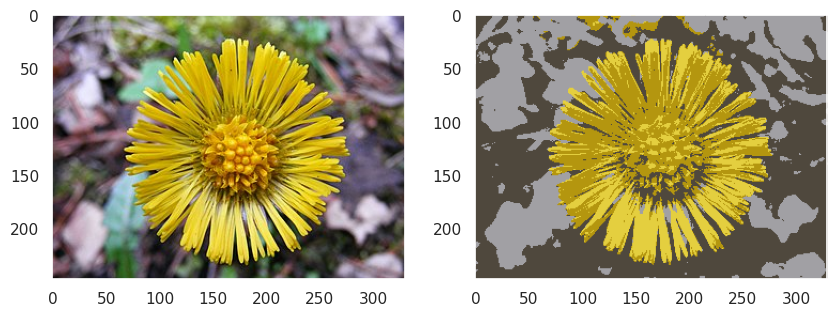

In [22]:
from PIL import Image
from io import BytesIO
from sklearn.cluster import KMeans
import matplotlib.image as mpimg

img = Image.open(BytesIO(r.content))
n_clusters = 4 # liczba klastrów; tyle kolorów będzie w obrazku
h, w = img.height, img.width
arr = np.array(img)
X = arr.reshape(-1, 3) # macierz obserwacji
model = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto') # model
model.fit(X)
centers = model.cluster_centers_.astype('uint8') 
labels = model.predict(X) # przypisanie do klastrów
X_new = centers[labels] # nowe obserwacje
arr_new = X_new.reshape(h, w, 3) # nowy obrazek
img_new = Image.fromarray(arr_new)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.grid(False)
ax2.grid(False)
ax1.imshow(img)
ax2.imshow(img_new);

### Regresja vs klasyfikacja

W regresji zmienna celu jest ciągła, w klasyfikacji jest kategoryjna. 

## Ocena dokładności modelu

W przypadku regresji bardzo często używaną miarą jest błąd średniokwadratowy (_mean squared error_, _MSE_):

\begin{equation*}
\operatorname{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{f}(x_i))^2.
\end{equation*}

* Podczas treningu $\operatorname{MSE}$ jest minimalizowane na zbiorze treningowym. Błąd ten jest nazywany błędem treningowym (*train error*). 
* Do oceny dokładności modelu obliczamy $\operatorname{MSE}$ na zbiorze testowym. Ten błąd z kolei nazywany jest błędem testowym (*test error*).

##### Przykład

Regresja wielomianowa, dane jak wcześniej. Dokonujemy podziału na zbiór treningowy i testowy. Dzięki temu możemy ocenić dokładność modelu na zbiorze testowym i wybrać odpowiednią złożoność modelu.

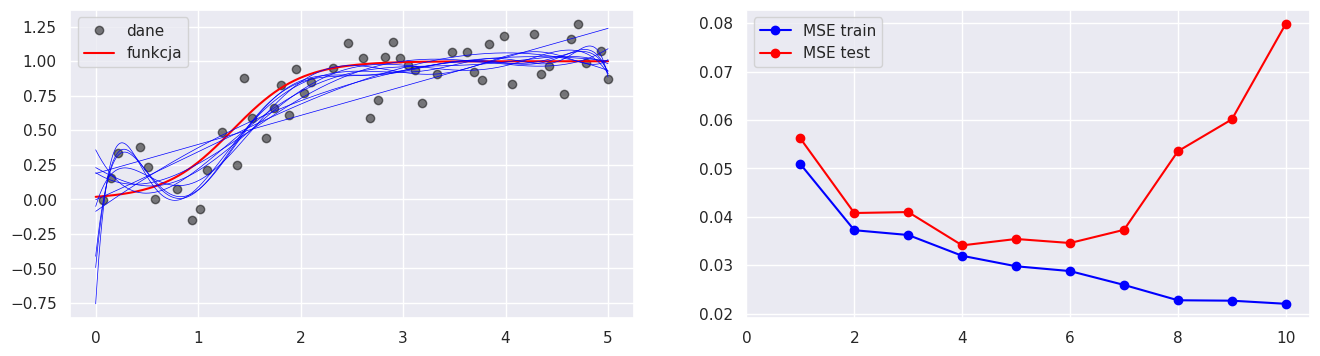

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# podział na zbiór treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 
MSE_train, MSE_test = [], [] 
max_deg = 10 # maksymalny stopień wielomianu
degrees = range(1, max_deg + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(x_train, y_train, 'o', label='dane', color='black', alpha=0.5)
pts = np.linspace(a, b, 1000)
ax1.plot(pts, f(pts), '-', label='funkcja', color='red')



for degree in degrees: # stopnie regresji wielomianowej
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train.reshape(-1, 1), y_train)
    MSE_train.append(mean_squared_error(y_train, model.predict(x_train.reshape(-1, 1))))
    MSE_test.append(mean_squared_error(y_test, model.predict(x_test.reshape(-1, 1))))
    ax1.plot(pts, model.predict(pts.reshape(-1, 1)), '-', color='blue', lw=.5)

ax2.plot(degrees, MSE_train, 'o-', label='MSE train', color='blue')
ax2.plot(degrees, MSE_test, 'o-', label='MSE test', color='red')
ax2.set_xlim(0, None)
ax1.legend()
ax2.legend();

### Kompromis między obciążeniem a wariancją (_bias-variance tradeoff_)

Wyżej widzieliśmy, że błąd predykcji dla $x_0$ można rozłożyć na błąd systematyczny i błąd losowy. Wzór ten uzyskujemy przy założeniu, że estymacja $\hat{f}$ została już wyliczona i jest znana. Zauważmy jednak, że $\hat{f}$ zależy od danych treningowych, zmiana danych treningowych niemal zawsze prowadzi do zmiany $\hat{f}$. Mamy zatem kolejny poziom losowości, związany z wyborem danych treningowych i wpływający na błąd predykcji. 

Ustalmy $x_0$. Niech $\mathbf{E}_{\mathcal{T}}$ oznacza wartość oczekiwaną względem losowego zbioru treningowego $\mathcal{T}= \{(x_1, y_1), \ldots, (x_n, y_n)\}$ (w praktyce zbiór $\mathcal{T}$ mamy tylko jeden). 
Wówczas oczekiwany (uśredniony) błąd predykcji dla $x_0$ jest równy:

\begin{equation*}
\begin{split}
\mathbf{E}_{\mathcal{T}}\mathbf{E}((Y - \hat{f}(X))^2|X=x_0) &= \mathbf{E}_{\mathcal{T}}\left([f(x_0) - \hat{f}(x_0)]^2 + \operatorname{Var}(\varepsilon)\right) \\
&= \mathbf{E}_{\mathcal{T}}[f(x_0) - \hat{f}(x_0)]^2 + \operatorname{Var}(\varepsilon) \\
&= \mathbf{E}_{\mathcal{T}}[f(x_0) - \mathbf{E}_{\mathcal{T}}\hat{f}(x_0) + \mathbf{E}_{\mathcal{T}}\hat{f}(x_0) - \hat{f}(x_0)]^2 + \operatorname{Var}(\varepsilon) \\
&= [f(x_0) - \mathbf{E}_{\mathcal{T}}\hat{f}(x_0)]^2 + \mathbf{E}_{\mathcal{T}}[\mathbf{E}_{\mathcal{T}}\hat{f}(x_0) - \hat{f}(x_0)]^2 + \operatorname{Var}(\varepsilon) \\
&= \operatorname{Bias}^2(\hat{f}(x_0)) + \operatorname{Var}_{\mathcal{T}}(\hat{f}(x_0)) + \operatorname{Var}(\varepsilon).
\end{split}
\end{equation*}

Podsumowując, oczekiwany błąd predykcji dla $x_0$ można rozłożyć na trzy składniki:

\begin{equation}
\begin{split}
\mathbf{E}_{\mathcal{T}}\mathbf{E}((Y - \hat{f}(X))^2|X=x_0) &= \operatorname{Bias}^2(\hat{f}(x_0)) + \operatorname{Var}_{\mathcal{T}}(\hat{f}(x_0)) + \operatorname{Var}(\varepsilon) \\
&= \text{Błąd obciążenia} + \text{Wariancja predykcji} + \text{Błąd losowy}.
\end{split}
\end{equation}

W powyższym wzorze:
* Pierwszy składnik to błąd obciążenia (_bias_), stopień w jakim estymacja $\hat{f}(x_0)$ różni się od $f(x_0)$. Duży błąd obciążenia wskazuje na niedouczenie modelu (*underfitting*), lub na jego nieadekwatność do danych (tzn. model jest już douczony, ale np. ze względu na swą prostotę nie jest w stanie uchwycić złożoności danych).
* Drugi składnik to wariancja predykcji. Może wzrastać wraz z komplikacją modelu. Duża wariancja predykcji wskazuje na dużą zależność modelu od danych treningowych i wskazuje na przeuczenie modelu (*overfitting*).
* Ostatni składnik to omawiany wcześniej nieredukowalny błąd losowy.

Zobacz Figure 3.5 (p. 150) w [PRML](https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/) oraz Figure 7.2 (p. 225) w [ESL](https://hastie.su.domains/ElemStatLearn/).